# 🌊 #30DayMapChallenge - Day 1: Points

**First map of the [#30DayMapChallenge](https://30daymapchallenge.com/) 2024, created for Náttúrufræðistofnun.**

---

### Overview
This map presents potential **swimming or bathing locations** across Iceland, represented with point data from **OpenStreetMap** and **IS 50V**. Using a **simple and clean point style**, it serves as a beginner-friendly introduction to mapping with Python, helping users become familiar with mapping tools and concepts.

### How to Use
Explore the map and experiment with its features. You’re encouraged to play around and create your own version as a way to practice your mapping skills.

---

### Attribution
- **License**: This notebook is published under **CC BY 4.0**.
- **Citation**: "*Credits: Náttúrufræðistofnun*"
- **Author**: Marco Pizzolato

| Run this code via free cloud platforms: | [![Binder](https://mybinder.org/badge.svg)](https://mybinder.org/v2/gh/lmi/30DayMapChallenge/master?filepath=/Day-1/Day01_Points.ipynb) | [![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/lmi/30DayMapChallenge/blob/master/Day-1/Day01_Points.ipynb) | [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/lmi/30DayMapChallenge/blob/master/Day-1/Day01_Points.ipynb) |
|---|---|---|---|

## Install packages

In [1]:
# Uncomment to install packages
#!pip install osmnx matplotlib

In [2]:
import osmnx as ox
import geopandas as gpd
import matplotlib.pyplot as plt
import requests
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

## Import the outline of Iceland
The outline of Iceland from IS_50V can be found here: https://gatt.natt.is/geonetwork/srv/ice/catalog.search#/metadata/FE3E66F8-7749-409A-8795-02207CE27613

In [ ]:
# URL of the GeoPackage
url = "https://gis.natt.is/geoserver/IS_50V/ows?service=WFS&version=1.0.0&request=GetFeature&typeName=IS_50V%3Astrandlina_flakar&maxFeatures=100000&outputFormat=application%2Fx-gpkg"

# Download the GeoPackage
response = requests.get(url)
with open("iceland_outline.gpkg", "wb") as f:
    f.write(response.content)

# Load the GeoPackage using GeoPandas
gdf_outline_full = gpd.read_file("iceland_outline.gpkg")

# Sort the polygons by area and keep only the top 3
gdf_outline_full['area'] = gdf_outline_full.geometry.area
gdf_outline = gdf_outline_full.nlargest(3, 'area')

## Get the points from OpenStreetMaps
Load the points using osmnx - https://osmnx.readthedocs.io/en/stable/

In [ ]:
# Define the place of interest (Iceland)
place_name = "Iceland"

# Define the tags for swimming-related features
swimming_tags = {
    'leisure': ['swimming_pool', 'bathing_place', 'water_park', 'hot_tub', 'hot_spring'],
    'sport': 'swimming',
    'amenity': 'public_bath',
    'swimming_pool': 'yes',
    'attraction': 'water_slide',
    'natural': 'hot_spring'
}

# Download geometries for swimming-related features
gdf_swimming = ox.geometries_from_place(place_name, swimming_tags)

# Create a new GeoDataFrame where all geometries are points (centroids for polygons/lines)
gdf_swimming['geometry'] = gdf_swimming['geometry'].apply(lambda geom: geom.centroid if geom.geom_type in ['Polygon', 'MultiPolygon', 'LineString'] else geom)

## Plot the results

c:\Python311\Lib\site-packages\geopandas\geodataframe.py:1640: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)
c:\Python311\Lib\site-packages\geopandas\geoseries.py:230: DeprecationWarning: Passing a SingleBlockManager to GeoSeries is deprecated and will raise in a future version. Use public APIs instead.
  super().__init__(data, index=index, name=name, **kwargs)
C:\Users\marco.pizzolato\AppData\Roaming\Python\Python311\site-packages\pandas\core\frame.py:706: DeprecationWarning: Passing a BlockManager to GeoDataFrame is deprecated and will raise in a future version. Use public APIs instead.
  warnings.warn(
c:\Python311\Lib\site-packages\geopandas\geodataframe.py:1640: DeprecationWarning: Passing a SingleBlockManager to Series is deprecated and will raise in a future version. Use public APIs instead.
  srs = pd.Series(*args, **kwargs)
c:\Python311\Lib\site-packages\g

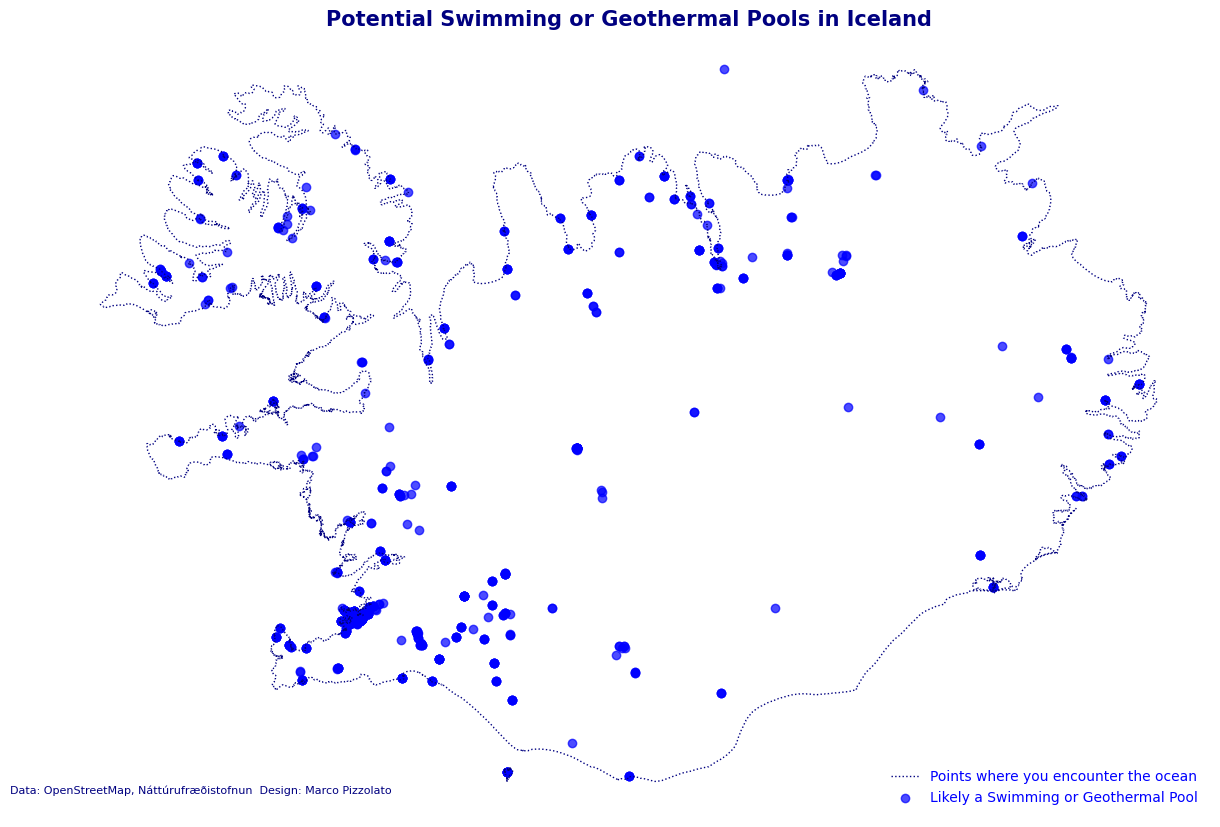

In [5]:
# Plot the results
fig, ax = plt.subplots(figsize=(15, 15))
plt.rcParams.update({'text.color' : "blue",
                     'axes.labelcolor' : "blue"})

# Plot Iceland's polygon outline
gdf_outline.boundary.plot(ax=ax, color='navy', linewidth=1, label="Points where you encounter the ocean", linestyle=':')

# Plot swimming-related points
gdf_swimming.plot(ax=ax, color='blue', alpha=0.7, label="Likely a Swimming or Geothermal Pool")

# Add title and legend
ax.set_title("Potential Swimming or Geothermal Pools in Iceland", fontsize=15, weight='bold', color='navy')
plt.figtext(0.1,0.25,'Data: OpenStreetMap, Náttúrufræðistofnun  Design: Marco Pizzolato', fontsize = 8, color='navy')
ax.legend(loc='lower right', frameon=False)

# Remove axis for a cleaner look
ax.set_axis_off()

plt.show()

## Save the image

In [6]:
# Save the figure as a PNG file
fig.savefig("Day01-Points.png", format='png', dpi=300, bbox_inches='tight')